In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH='data/dogbreed/'
sz=224
arch=resnext50
bs=16

In [3]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)
n, len(val_idxs)

(10222, 2044)

In [6]:
!ls {PATH}

labels.csv	models	  sample_submission.csv      subm  test.zip  train
labels.csv.zip	preds.bc  sample_submission.csv.zip  test  tmp	     train.zip


In [4]:
!ls {PATH}test | head

000621fb3cbb32d8935728e48679680e.jpg
00102ee9d8eb90812350685311fe5890.jpg
0012a730dfa437f5f3613fb75efcd4ce.jpg
001510bc8570bbeee98c8d80c8a95ec1.jpg
001a5f3114548acdefa3d4da05474c2e.jpg
00225dcd3e4d2410dd53239f95c0352f.jpg
002c2a3117c2193b4d26400ce431eebd.jpg
002c58d413a521ae8d1a5daeb35fc803.jpg
002f80396f1e3db687c5932d7978b196.jpg
0036c6bcec6031be9e62a257b1c3c442.jpg
ls: write error: Broken pipe


In [5]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test', bs=bs)

In [6]:
fns = [PATH+data.trn_ds.fnames[n] for f in ;

SyntaxError: invalid syntax (<ipython-input-6-fdbfea84660b>, line 1)

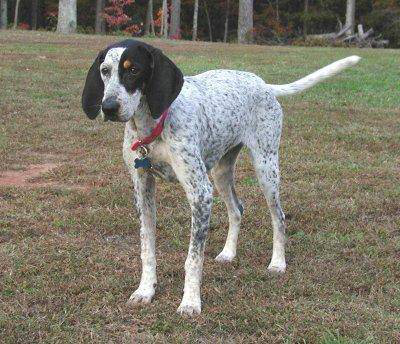

In [7]:
img = PIL.Image.open(fn); img

In [8]:
img.size

(400, 344)

In [9]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size_d.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [10]:
row_sz[:5]

array([500, 500, 400, 500, 231])

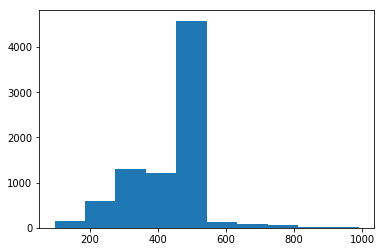

In [11]:
plt.hist(row_sz[row_sz<1000]);

In [12]:
len(data.trn_ds), len(data.test_ds)

(8178, 10357)

In [13]:
len(data.classes), data.classes[:5]

(120,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier'])

In [14]:
!ls {PATH}tmp/340

models	test  tmp  train


In [5]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, 
                                        tfms=tfms, suffix='.jpg', val_idxs=val_idxs, 
                                        test_name='test', bs=bs, num_workers=4)
    return data if sz>300 else data.resize(340, 'tmp')

In [6]:
data = get_data(sz, bs)

A Jupyter Widget

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)
learn.lr_find()

A Jupyter Widget

  4%|▎         | 18/512 [00:02<01:02,  7.96it/s, loss=5.39]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


 79%|███████▉  | 405/512 [00:50<00:13,  8.09it/s, loss=8.53]

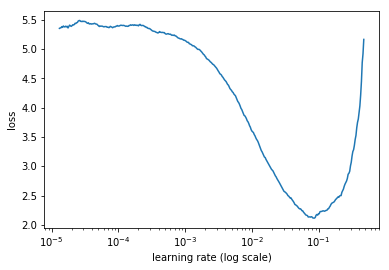

In [8]:
learn.sched.plot()

In [7]:
1e-4

0.0001

In [9]:
learn.fit(1e-2, 5)

A Jupyter Widget


  3%|▎         | 17/512 [00:00<00:06, 77.50it/s, loss=4.79]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



 45%|████▍     | 230/512 [00:04<00:05, 52.91it/s, loss=1.08]


 86%|████████▌ | 439/512 [00:06<00:01, 72.95it/s, loss=0.749]

 91%|█████████▏| 468/512 [00:06<00:00, 75.10it/s, loss=0.756]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.71181  0.38996  0.87647]                        
[ 1.       0.4987   0.33829  0.8916 ]                        
[ 2.       0.45136  0.32376  0.90039]                        
[ 3.       0.35559  0.31249  0.89779]                        
[ 4.       0.33732  0.32538  0.89551]                        



In [10]:
learn.precompute = False
learn.fit(1e-2, 5, cycle_len=1)

A Jupyter Widget

  0%|          | 1/512 [00:00<04:24,  1.93it/s, loss=0.697]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.42931  0.29581  0.90869]                        
[ 1.       0.38918  0.27946  0.91357]                        
[ 2.       0.36557  0.28564  0.90869]                        
[ 3.       0.32716  0.29681  0.90967]                        
[ 4.       0.29095  0.28576  0.9082 ]                        



In [11]:
learn.save('dogbreed_299_resnext_pre_differential_lr')

In [14]:
learn.set_data(get_data(299, bs))
learn.freeze()

A Jupyter Widget

In [14]:
# learn.save('dogbreed_299_resnext_pre_differential_lr')
learn.load('dogbreed_299_resnext_pre_differential_lr')

In [15]:
learn.fit(1e-2, 3, cycle_len=1)

A Jupyter Widget

  0%|          | 1/293 [00:00<04:23,  1.11it/s, loss=0.19]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.29714  0.24583  0.92759]                        
[ 1.       0.40986  0.24652  0.9183 ]                        
[ 2.       0.33729  0.24857  0.92417]                        



In [14]:
learn.save('dogbreed_299_resnext_pre_differential_lr')

In [ ]:
learn.load('dogbreed_299_resnext_pre_differential_lr')

In [12]:
learn.unfreeze()
learn.bn_freeze(True)
%time learn.fit([1e-5, 1e-4, 1e-2], 1, cycle_len=1)

A Jupyter Widget

  0%|          | 0/512 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.31767  0.30625  0.90576]                        

CPU times: user 7min 4s, sys: 20.2 s, total: 7min 24s
Wall time: 3min 15s


In [ ]:
learn.precompute=False
learn.fit(1e-2, 5, cycle_len=1)

A Jupyter Widget

  0%|          | 0/512 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[  0.00000e+00   3.25355e+27   2.69875e+27   9.76600e-03]       
  7%|▋         | 36/512 [00:13<02:59,  2.65it/s, loss=5.86e+27]

In [26]:
learn.freeze()

In [16]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

  0%|          | 0/293 [00:01<?, ?it/s, loss=0.168]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.28778  0.23749  0.92368]                        
[ 1.       0.37317  0.24873  0.91928]                        
[ 2.       0.27177  0.24645  0.92466]                        
[ 3.       0.27153  0.26103  0.91683]                        
[ 4.       0.26659  0.24944  0.92368]                        
[ 5.       0.24938  0.23721  0.92661]                        
[ 6.       0.24254  0.23708  0.92661]                        



In [28]:
learn.save('dogbreed_299_resnext_post_differential_lr')

In [29]:
learn.fit(1e-2, 2, cycle_mult=2, cycle_len=2)

A Jupyter Widget

  0%|          | 0/293 [00:00<?, ?it/s]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.33069  0.25178  0.92172]                        
[ 1.       0.21445  0.24171  0.92564]                        
[ 2.       0.23283  0.25192  0.92123]                        
[ 3.       0.23341  0.24152  0.92612]                        
[ 4.       0.23494  0.24155  0.92906]                        
[ 5.       0.20339  0.24405  0.92955]                        



In [30]:
%time log_preds, y = learn.TTA()
metrics.log_loss(y, np.exp(log_preds)), accuracy(log_preds, y)
# probs = np.exp(log_preds)

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


CPU times: user 7min 11s, sys: 19.1 s, total: 7min 30s
Wall time: 1min 53s


(0.23763760957244082, 0.93248532289628183)

In [31]:
learn.save('dogbreed_299_resnext_post_differential_lr')

In [32]:
%time test_log_preds, y = learn.TTA(is_test=True)
# metrics.log_loss(y, np.exp(log_preds)), accuracy(log_preds, y)
probs = np.exp(test_log_preds)

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


CPU times: user 41min 21s, sys: 1min 51s, total: 43min 13s
Wall time: 13min 18s


In [33]:
preds = np.argmax(test_log_preds, axis=1)
probs = np.exp(test_log_preds)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[14  0  0 ...,  0  0  0]
 [ 0 24  0 ...,  0  0  0]
 [ 0  0 15 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 16  0  0]
 [ 0  0  0 ...,  0 14  0]
 [ 0  0  0 ...,  0  0 13]]


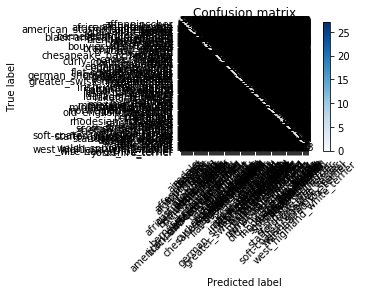

In [35]:
plot_confusion_matrix(cm, data.classes)

In [46]:
%time log_preds, y = learn.TTA(is_test=True)

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


CPU times: user 37min 15s, sys: 2min 54s, total: 40min 10s
Wall time: 11min 56s


In [55]:
probs = np.exp(log_preds)

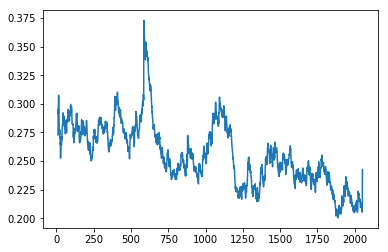

In [28]:
#2:05:20
learn.sched.plot_loss()

In [48]:
data.test_ds.fnames

['test/2ce015d0d017c595bb64627a5749e3bd.jpg',
 'test/5bad43e776606caab0912c9e7f0e75ff.jpg',
 'test/89357a5cef0812f2ba888041de62a243.jpg',
 'test/b8da90f454f62fb33c83715a404aca3b.jpg',
 'test/000621fb3cbb32d8935728e48679680e.jpg',
 'test/00102ee9d8eb90812350685311fe5890.jpg',
 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'test/002f80396f1e3db687c5932d7978b196.jpg',
 'test/0036c6bcec6031be9e62a257b1c3c442.jpg',
 'test/0041940322116ae58c38130f5a6f71f9.jpg',
 'test/0042d6bf3e5f3700865886db32689436.jpg',
 'test/00485d47de966a9437ad3b33ac193b6f.jpg',
 'test/00496f65de6cc319145ce97bd6e90360.jpg',
 'test/004bf14426d1a830d459a9e0c0721309.jpg',
 'test/004c3721eb88358f462cdcec6b2380b7.jpg',
 'test/00559f56aab7e0a7749220f6aed65162.jpg',
 'test/005b281f1a4d6f29d527c9585e9

In [34]:
probs.shape

(10357, 120)

In [35]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [36]:
df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,1.271619e-09,4.914671e-10,1.566088e-09,7.981370e-08,2.539702e-08,6.013794e-06,4.151496e-09,7.133666e-10,3.402509e-09,2.706627e-10,...,5.386099e-10,1.123894e-10,1.255398e-08,1.147299e-09,7.792850e-09,3.801880e-10,5.663496e-11,9.785718e-11,1.408829e-10,4.467561e-09
1,5.728948e-06,2.926408e-05,1.530834e-04,1.277289e-05,5.498644e-05,3.413648e-05,1.934480e-06,5.169741e-07,4.555795e-06,9.446680e-06,...,1.384327e-05,1.553171e-06,5.094542e-06,9.626209e-05,4.134172e-05,5.477110e-04,5.909183e-07,2.716726e-06,4.461092e-06,3.241010e-06
2,4.553908e-07,3.060049e-08,1.898515e-06,8.458304e-08,4.407557e-05,6.785196e-08,7.570343e-08,2.817219e-06,4.115308e-06,5.555830e-05,...,3.652467e-07,2.613235e-03,7.560913e-04,4.663273e-03,7.737905e-06,1.062649e-07,1.024330e-05,1.202352e-06,1.721969e-04,4.107025e-07
3,4.926000e-09,3.497408e-07,3.391270e-08,5.308528e-09,9.333236e-07,4.167810e-08,1.398285e-09,7.375650e-08,5.131314e-09,5.000814e-10,...,1.807108e-08,1.903928e-07,1.163108e-07,5.610588e-07,2.267823e-07,1.664766e-09,4.594023e-10,4.922148e-06,1.817432e-09,5.148814e-09
4,4.845546e-08,7.598171e-09,1.488603e-09,1.533750e-10,1.456950e-10,6.076951e-10,2.561577e-10,9.093000e-10,7.886691e-10,4.291540e-08,...,8.652032e-09,1.724250e-08,3.950603e-09,2.750967e-09,3.964242e-09,4.796978e-10,3.499065e-09,4.922326e-10,9.055356e-10,8.087949e-09


In [37]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w'); 
    c.flush()

In [38]:
save_array(f'{PATH}preds.bc', df)

In [39]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [40]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,2ce015d0d017c595bb64627a5749e3bd,1.271619e-09,4.914671e-10,1.566088e-09,7.981370e-08,2.539702e-08,6.013794e-06,4.151496e-09,7.133666e-10,3.402509e-09,...,5.386099e-10,1.123894e-10,1.255398e-08,1.147299e-09,7.792850e-09,3.801880e-10,5.663496e-11,9.785718e-11,1.408829e-10,4.467561e-09
1,5bad43e776606caab0912c9e7f0e75ff,5.728948e-06,2.926408e-05,1.530834e-04,1.277289e-05,5.498644e-05,3.413648e-05,1.934480e-06,5.169741e-07,4.555795e-06,...,1.384327e-05,1.553171e-06,5.094542e-06,9.626209e-05,4.134172e-05,5.477110e-04,5.909183e-07,2.716726e-06,4.461092e-06,3.241010e-06
2,89357a5cef0812f2ba888041de62a243,4.553908e-07,3.060049e-08,1.898515e-06,8.458304e-08,4.407557e-05,6.785196e-08,7.570343e-08,2.817219e-06,4.115308e-06,...,3.652467e-07,2.613235e-03,7.560913e-04,4.663273e-03,7.737905e-06,1.062649e-07,1.024330e-05,1.202352e-06,1.721969e-04,4.107025e-07
3,b8da90f454f62fb33c83715a404aca3b,4.926000e-09,3.497408e-07,3.391270e-08,5.308528e-09,9.333236e-07,4.167810e-08,1.398285e-09,7.375650e-08,5.131314e-09,...,1.807108e-08,1.903928e-07,1.163108e-07,5.610588e-07,2.267823e-07,1.664766e-09,4.594023e-10,4.922148e-06,1.817432e-09,5.148814e-09
4,000621fb3cbb32d8935728e48679680e,4.845546e-08,7.598171e-09,1.488603e-09,1.533750e-10,1.456950e-10,6.076951e-10,2.561577e-10,9.093000e-10,7.886691e-10,...,8.652032e-09,1.724250e-08,3.950603e-09,2.750967e-09,3.964242e-09,4.796978e-10,3.499065e-09,4.922326e-10,9.055356e-10,8.087949e-09


In [41]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [42]:
FileLink(f'{SUBM}subm.gz')

/home/bmn/src/ai.learn/fast.ai/fastai/courses/dl1/data/dogbreed/subm/subm.gz

In [36]:
save_array('preds_final.bc', df)